In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from rapidfuzz import process, fuzz
import unidecode

In [2]:
afiliados = pd.read_csv(r"C:\Users\GPSantana\Downloads\Afiliados_20251121-142311.csv",sep=';',encoding='latin1',header=1)

afiliados

,Periodo,CNAE dos dígitos,Total Regimenes(RG+RETA) Total Sexo
0,202101,Total CNAEs (RG+RETA),17610958
1,202101,"01.Agricultura, ganadería, caza y servicios re...",308838
2,202101,02.Silvicultura y explotación forestal,25166
3,202101,03.Pesca y acuicultura,2876
4,202101,"05.Extracción de antracita, hulla y lignito",137
...,...,...,...
440,202501,"95.Reparación de ordenadores, efectos personal...",52426
441,202501,96.Otros servicios personales,355573
442,202501,97.Actividades de los hogares como empleadores...,36904
443,202501,98.Actividades de los hogares como producto,0


In [3]:
afiliados["Total Regimenes(RG+RETA) Total Sexo"] = (
    afiliados["Total Regimenes(RG+RETA) Total Sexo"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)
afiliados.head(10)

,Periodo,CNAE dos dígitos,Total Regimenes(RG+RETA) Total Sexo
0,202101,Total CNAEs (RG+RETA),17610958.0
1,202101,"01.Agricultura, ganadería, caza y servicios re...",308838.0
2,202101,02.Silvicultura y explotación forestal,25166.0
3,202101,03.Pesca y acuicultura,2876.0
4,202101,"05.Extracción de antracita, hulla y lignito",137.0
5,202101,06.Extracción de crudo de petróleo y gas natural,161.0
6,202101,07.Extracción de minerales metálicos,3252.0
7,202101,08.Otras industrias extractivas,15313.0
8,202101,09.Actividades de apoyo a las industrias extra...,1198.0
9,202101,10.Industria de la alimentación,387381.0


In [4]:
afiliados = afiliados.pivot(
    index="CNAE dos dígitos",
    columns="Periodo",
    values="Total Regimenes(RG+RETA) Total Sexo"
)

afiliados

Periodo,202101,202201,202301,202401,202501
CNAE dos dígitos,,,,,
"01.Agricultura, ganadería, caza y servicios relacionados con las mismas.",308838.0,307626.0,305269.0,304949.0,303673.0
02.Silvicultura y explotación forestal,25166.0,24933.0,27599.0,28412.0,29963.0
03.Pesca y acuicultura,2876.0,2753.0,2716.0,2685.0,2618.0
"05.Extracción de antracita, hulla y lignito",137.0,117.0,110.0,97.0,101.0
06.Extracción de crudo de petróleo y gas natural,161.0,151.0,148.0,119.0,120.0
...,...,...,...,...,...
96.Otros servicios personales,310575.0,328855.0,339371.0,348400.0,355573.0
97.Actividades de los hogares como empleadores de personal doméstico,41133.0,40194.0,39254.0,38314.0,36904.0
98.Actividades de los hogares como producto,0.0,0.0,0.0,0.0,0.0


In [5]:
df_norm=afiliados.copy()

df_norm.columns = df_norm.columns.astype(str)

totales = df_norm.loc["Total CNAEs (RG+RETA)"]

for col in df_norm.columns:
    df_norm[col + "_norm"] = df_norm[col] / totales[col]

df_norm

Periodo,202101,202201,202301,202401,202501,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
CNAE dos dígitos,,,,,,,,,,
"01.Agricultura, ganadería, caza y servicios relacionados con las mismas.",308838.0,307626.0,305269.0,304949.0,303673.0,0.017537,0.016748,0.016169,0.015695,0.015245
02.Silvicultura y explotación forestal,25166.0,24933.0,27599.0,28412.0,29963.0,0.001429,0.001357,0.001462,0.001462,0.001504
03.Pesca y acuicultura,2876.0,2753.0,2716.0,2685.0,2618.0,0.000163,0.000150,0.000144,0.000138,0.000131
"05.Extracción de antracita, hulla y lignito",137.0,117.0,110.0,97.0,101.0,0.000008,0.000006,0.000006,0.000005,0.000005
06.Extracción de crudo de petróleo y gas natural,161.0,151.0,148.0,119.0,120.0,0.000009,0.000008,0.000008,0.000006,0.000006
...,...,...,...,...,...,...,...,...,...,...
96.Otros servicios personales,310575.0,328855.0,339371.0,348400.0,355573.0,0.017635,0.017904,0.017975,0.017931,0.017851
97.Actividades de los hogares como empleadores de personal doméstico,41133.0,40194.0,39254.0,38314.0,36904.0,0.002336,0.002188,0.002079,0.001972,0.001853
98.Actividades de los hogares como producto,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
select=["202101_norm","202201_norm","202301_norm","202401_norm","202501_norm"]

df_norm1=df_norm[select]

df_norm1

Periodo,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
CNAE dos dígitos,,,,,
"01.Agricultura, ganadería, caza y servicios relacionados con las mismas.",0.017537,0.016748,0.016169,0.015695,0.015245
02.Silvicultura y explotación forestal,0.001429,0.001357,0.001462,0.001462,0.001504
03.Pesca y acuicultura,0.000163,0.000150,0.000144,0.000138,0.000131
"05.Extracción de antracita, hulla y lignito",0.000008,0.000006,0.000006,0.000005,0.000005
06.Extracción de crudo de petróleo y gas natural,0.000009,0.000008,0.000008,0.000006,0.000006
...,...,...,...,...,...
96.Otros servicios personales,0.017635,0.017904,0.017975,0.017931,0.017851
97.Actividades de los hogares como empleadores de personal doméstico,0.002336,0.002188,0.002079,0.001972,0.001853
98.Actividades de los hogares como producto,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
cols_norm = [c for c in df_norm1.columns if c.endswith("_norm")]
df_norm1[cols_norm] = (df_norm1[cols_norm] * 100).round(3)

df_norm1

C:\Users\GPSantana\AppData\Local\Temp\ipykernel_6372\3275523423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm1[cols_norm] = (df_norm1[cols_norm] * 100).round(3)


Periodo,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
CNAE dos dígitos,,,,,
"01.Agricultura, ganadería, caza y servicios relacionados con las mismas.",1.754,1.675,1.617,1.569,1.525
02.Silvicultura y explotación forestal,0.143,0.136,0.146,0.146,0.150
03.Pesca y acuicultura,0.016,0.015,0.014,0.014,0.013
"05.Extracción de antracita, hulla y lignito",0.001,0.001,0.001,0.000,0.001
06.Extracción de crudo de petróleo y gas natural,0.001,0.001,0.001,0.001,0.001
...,...,...,...,...,...
96.Otros servicios personales,1.764,1.790,1.797,1.793,1.785
97.Actividades de los hogares como empleadores de personal doméstico,0.234,0.219,0.208,0.197,0.185
98.Actividades de los hogares como producto,0.000,0.000,0.000,0.000,0.000


In [8]:
df = pd.read_clipboard(sep=r"\s{2,}", engine="python", header=None)

df

,0,1,2,3,4
0,"A Agricultura, ganadería y pesca 701.900",28.076,7.019,35.095,638.729
1,B Industrias extractivas 29.600,2.368,592,1.776,25.456
2,"Industria alimentaria, textil y del calzado 72...",86.892,65.169,65.169,572.039
3,20 Industria química 137.300,13.730,10.984,13.730,109.840
4,27 Fabricación de material y equipo eléctrico ...,8.900,7.120,9.790,70.310
5,29 Fabricación de vehículos de motor 236.100,23.610,21.249,23.610,188.880
6,Resto industria 1.381.200,124.308,110.496,124.308,1.132.584
7,"35 Suministro de energía eléctrica, gas y vapo...",8.930,8.037,9.823,70.547
8,E Suministro de agua y actividades de saneamie...,15.224,11.072,13.840,109.336
9,F Construcción 1.378.500,68.925,27.570,137.850,1.171.725


In [9]:
def separar_texto_numero(texto):
    match = re.match(r"(.+)\s(\d[\d\.]*)$", texto)
    if match:
        return pd.Series([match.group(1), match.group(2)])
    else:
        return pd.Series([texto, None])

df[['descripcion', 'numero']] = df[0].apply(separar_texto_numero)


df = df[['descripcion', 'numero', 1, 2, 3, 4]]
df.columns = ['descripcion', 'Ocupados', 'Automatizacion', 'Creacion', 'Productividad', 'Poco o nulo efecto']

print(df)

                                          descripcion    Ocupados  \
0                    A Agricultura, ganadería y pesca     701.900   
1                            B Industrias extractivas      29.600   
2         Industria alimentaria, textil y del calzado     724.100   
3                                20 Industria química     137.300   
4       27 Fabricación de material y equipo eléctrico      89.000   
5                29 Fabricación de vehículos de motor     236.100   
6                                     Resto industria   1.381.200   
7     35 Suministro de energía eléctrica, gas y vapor      89.300   
8   E Suministro de agua y actividades de saneamiento     138.400   
9                                      F Construcción   1.378.500   
10             G Comercio al por mayor y al por menor   3.168.300   
11                      H Transporte y almacenamiento   1.186.000   
12                                       I Hostelería   1.879.500   
13                             Med

In [10]:
afiliados2 = pd.read_csv(r"C:\Users\GPSantana\Downloads\Afiliados_20251121-135914.csv",sep=';',encoding='latin1',header=1)

afiliados2

,Periodo,Seccion cnae,Total Regimenes(RG+RETA) Total Sexo
0,202101,TODAS LAS SECCIONES,17610958
1,202101,"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",336880
2,202101,B. INDUSTRIAS EXTRACTIVAS,20061
3,202101,C. INDUSTRIA MANUFACTURERA,2024473
4,202101,"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR...",35691
...,...,...,...
105,202501,Q. ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES,2037383
106,202501,"R. ACTIVIDADES ARTÍSTICAS, RECREATIVAS Y DE EN...",396760
107,202501,S. OTROS SERVICIOS,554566
108,202501,T. ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,36904


In [11]:
afiliados2["Total Regimenes(RG+RETA) Total Sexo"] = (
    afiliados2["Total Regimenes(RG+RETA) Total Sexo"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

afiliados2.head()

,Periodo,Seccion cnae,Total Regimenes(RG+RETA) Total Sexo
0,202101,TODAS LAS SECCIONES,17610958.0
1,202101,"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",336880.0
2,202101,B. INDUSTRIAS EXTRACTIVAS,20061.0
3,202101,C. INDUSTRIA MANUFACTURERA,2024473.0
4,202101,"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR...",35691.0


In [12]:
afiliados2 = afiliados2.pivot(
    index="Seccion cnae",
    columns="Periodo",
    values="Total Regimenes(RG+RETA) Total Sexo"
)

afiliados2

Periodo,202101,202201,202301,202401,202501
Seccion cnae,,,,,
"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",336880.0,335312.0,335584.0,336046.0,336254.0
B. INDUSTRIAS EXTRACTIVAS,20061.0,20679.0,20989.0,20601.0,20762.0
C. INDUSTRIA MANUFACTURERA,2024473.0,2075758.0,2107504.0,2143843.0,2173815.0
"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",35691.0,36143.0,38383.0,39757.0,39736.0
"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO. GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN",145961.0,150470.0,154387.0,159773.0,164881.0
F. CONSTRUCCIÓN,1234183.0,1295740.0,1350236.0,1381347.0,1409151.0
G. COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS,3126231.0,3206577.0,3225972.0,3268900.0,3308823.0
H. TRANSPORTE Y ALMACENAMIENTO,925628.0,958726.0,998849.0,1037150.0,1101893.0
I. HOSTELERÍA,1275337.0,1446745.0,1545698.0,1615113.0,1672412.0


In [13]:
df_norm2=afiliados2.copy()

df_norm2.columns = df_norm2.columns.astype(str)

totales2 = df_norm2.loc["TODAS LAS SECCIONES"]

for col in df_norm2.columns:
    df_norm2[col + "_norm"] = df_norm2[col] / totales2[col]

df_norm2

Periodo,202101,202201,202301,202401,202501,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
Seccion cnae,,,,,,,,,,
"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",336880.0,335312.0,335584.0,336046.0,336254.0,0.019129,0.018256,0.017774,0.017295,0.016881
B. INDUSTRIAS EXTRACTIVAS,20061.0,20679.0,20989.0,20601.0,20762.0,0.001139,0.001126,0.001112,0.001060,0.001042
C. INDUSTRIA MANUFACTURERA,2024473.0,2075758.0,2107504.0,2143843.0,2173815.0,0.114955,0.113012,0.111624,0.110338,0.109130
"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",35691.0,36143.0,38383.0,39757.0,39736.0,0.002027,0.001968,0.002033,0.002046,0.001995
"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO. GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN",145961.0,150470.0,154387.0,159773.0,164881.0,0.008288,0.008192,0.008177,0.008223,0.008277
F. CONSTRUCCIÓN,1234183.0,1295740.0,1350236.0,1381347.0,1409151.0,0.070080,0.070545,0.071515,0.071094,0.070743
G. COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS,3126231.0,3206577.0,3225972.0,3268900.0,3308823.0,0.177516,0.174578,0.170864,0.168242,0.166110
H. TRANSPORTE Y ALMACENAMIENTO,925628.0,958726.0,998849.0,1037150.0,1101893.0,0.052560,0.052196,0.052904,0.053379,0.055318
I. HOSTELERÍA,1275337.0,1446745.0,1545698.0,1615113.0,1672412.0,0.072417,0.078766,0.081868,0.083126,0.083959


In [14]:
select=["202101_norm","202201_norm","202301_norm","202401_norm","202501_norm"]

df_norm2=df_norm2[select]

df_norm2

Periodo,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
Seccion cnae,,,,,
"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",0.019129,0.018256,0.017774,0.017295,0.016881
B. INDUSTRIAS EXTRACTIVAS,0.001139,0.001126,0.001112,0.001060,0.001042
C. INDUSTRIA MANUFACTURERA,0.114955,0.113012,0.111624,0.110338,0.109130
"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",0.002027,0.001968,0.002033,0.002046,0.001995
"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO. GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN",0.008288,0.008192,0.008177,0.008223,0.008277
F. CONSTRUCCIÓN,0.070080,0.070545,0.071515,0.071094,0.070743
G. COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS,0.177516,0.174578,0.170864,0.168242,0.166110
H. TRANSPORTE Y ALMACENAMIENTO,0.052560,0.052196,0.052904,0.053379,0.055318
I. HOSTELERÍA,0.072417,0.078766,0.081868,0.083126,0.083959


In [15]:
cols_norm2 = [c for c in df_norm2.columns if c.endswith("_norm")]
df_norm2[cols_norm2] = (df_norm2[cols_norm2] * 100).round(3)

df_norm2

C:\Users\GPSantana\AppData\Local\Temp\ipykernel_6372\4248591517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm2[cols_norm2] = (df_norm2[cols_norm2] * 100).round(3)


Periodo,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
Seccion cnae,,,,,
"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",1.913,1.826,1.777,1.730,1.688
B. INDUSTRIAS EXTRACTIVAS,0.114,0.113,0.111,0.106,0.104
C. INDUSTRIA MANUFACTURERA,11.496,11.301,11.162,11.034,10.913
"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",0.203,0.197,0.203,0.205,0.199
"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO. GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN",0.829,0.819,0.818,0.822,0.828
F. CONSTRUCCIÓN,7.008,7.054,7.152,7.109,7.074
G. COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS,17.752,17.458,17.086,16.824,16.611
H. TRANSPORTE Y ALMACENAMIENTO,5.256,5.220,5.290,5.338,5.532
I. HOSTELERÍA,7.242,7.877,8.187,8.313,8.396


In [16]:
df_norm2 = df_norm2.reset_index()

In [21]:
df_norm1 = df_norm1.reset_index()

In [22]:
df3 = df_norm1.rename(columns={df_norm1.columns[0]: 'descripcion'})
df4 = df_norm2.rename(columns={df_norm2.columns[0]: 'descripcion'})


cols = ['descripcion', "202101_norm", "202201_norm", "202301_norm", "202401_norm", "202501_norm"]
df3 = df3[cols]
df4 = df4[cols]

df_combined_norm = pd.concat([df3, df4], ignore_index=True)
            
df_combined_norm

Periodo,descripcion,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm
0,"01.Agricultura, ganadería, caza y servicios re...",1.754,1.675,1.617,1.569,1.525
1,02.Silvicultura y explotación forestal,0.143,0.136,0.146,0.146,0.150
2,03.Pesca y acuicultura,0.016,0.015,0.014,0.014,0.013
3,"05.Extracción de antracita, hulla y lignito",0.001,0.001,0.001,0.000,0.001
4,06.Extracción de crudo de petróleo y gas natural,0.001,0.001,0.001,0.001,0.001
...,...,...,...,...,...,...
106,"R. ACTIVIDADES ARTÍSTICAS, RECREATIVAS Y DE EN...",1.676,1.831,1.927,1.953,1.992
107,S. OTROS SERVICIOS,2.883,2.870,2.858,2.818,2.784
108,T. ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,0.234,0.219,0.208,0.197,0.185
109,TODAS LAS SECCIONES,100.000,100.000,100.000,100.000,100.000


In [23]:
cols = ['202101_norm', '202201_norm', '202301_norm', '202401_norm', '202501_norm']

for i in range(1, len(cols)):
    prev_col = cols[i-1]
    curr_col = cols[i]
    new_col = f"var_{prev_col[:6]}_{curr_col[:6]}"  
    
    df_combined_norm[new_col] = (((df_combined_norm[curr_col] - df_combined_norm[prev_col]) / df_combined_norm[prev_col]) * 100).round(2)

df_combined_norm

Periodo,descripcion,202101_norm,202201_norm,202301_norm,202401_norm,202501_norm,var_202101_202201,var_202201_202301,var_202301_202401,var_202401_202501
0,"01.Agricultura, ganadería, caza y servicios re...",1.754,1.675,1.617,1.569,1.525,-4.50,-3.46,-2.97,-2.80
1,02.Silvicultura y explotación forestal,0.143,0.136,0.146,0.146,0.150,-4.90,7.35,0.00,2.74
2,03.Pesca y acuicultura,0.016,0.015,0.014,0.014,0.013,-6.25,-6.67,0.00,-7.14
3,"05.Extracción de antracita, hulla y lignito",0.001,0.001,0.001,0.000,0.001,0.00,0.00,-100.00,inf
4,06.Extracción de crudo de petróleo y gas natural,0.001,0.001,0.001,0.001,0.001,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
106,"R. ACTIVIDADES ARTÍSTICAS, RECREATIVAS Y DE EN...",1.676,1.831,1.927,1.953,1.992,9.25,5.24,1.35,2.00
107,S. OTROS SERVICIOS,2.883,2.870,2.858,2.818,2.784,-0.45,-0.42,-1.40,-1.21
108,T. ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,0.234,0.219,0.208,0.197,0.185,-6.41,-5.02,-5.29,-6.09
109,TODAS LAS SECCIONES,100.000,100.000,100.000,100.000,100.000,0.00,0.00,0.00,0.00


In [24]:
sel=["descripcion","var_202101_202201","var_202201_202301","var_202301_202401","var_202401_202501"]

df_ia_norm=df_combined_norm[sel]

df_ia_norm

Periodo,descripcion,var_202101_202201,var_202201_202301,var_202301_202401,var_202401_202501
0,"01.Agricultura, ganadería, caza y servicios re...",-4.50,-3.46,-2.97,-2.80
1,02.Silvicultura y explotación forestal,-4.90,7.35,0.00,2.74
2,03.Pesca y acuicultura,-6.25,-6.67,0.00,-7.14
3,"05.Extracción de antracita, hulla y lignito",0.00,0.00,-100.00,inf
4,06.Extracción de crudo de petróleo y gas natural,0.00,0.00,0.00,0.00
...,...,...,...,...,...
106,"R. ACTIVIDADES ARTÍSTICAS, RECREATIVAS Y DE EN...",9.25,5.24,1.35,2.00
107,S. OTROS SERVICIOS,-0.45,-0.42,-1.40,-1.21
108,T. ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,-6.41,-5.02,-5.29,-6.09
109,TODAS LAS SECCIONES,0.00,0.00,0.00,0.00


In [25]:
df_ia2=df_ia_norm.copy()

df_ia2

Periodo,descripcion,var_202101_202201,var_202201_202301,var_202301_202401,var_202401_202501
0,"01.Agricultura, ganadería, caza y servicios re...",-4.50,-3.46,-2.97,-2.80
1,02.Silvicultura y explotación forestal,-4.90,7.35,0.00,2.74
2,03.Pesca y acuicultura,-6.25,-6.67,0.00,-7.14
3,"05.Extracción de antracita, hulla y lignito",0.00,0.00,-100.00,inf
4,06.Extracción de crudo de petróleo y gas natural,0.00,0.00,0.00,0.00
...,...,...,...,...,...
106,"R. ACTIVIDADES ARTÍSTICAS, RECREATIVAS Y DE EN...",9.25,5.24,1.35,2.00
107,S. OTROS SERVICIOS,-0.45,-0.42,-1.40,-1.21
108,T. ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,-6.41,-5.02,-5.29,-6.09
109,TODAS LAS SECCIONES,0.00,0.00,0.00,0.00


In [30]:
def normalizar(texto):
    return unidecode.unidecode(str(texto)).lower().strip()

df['descripcion_norm'] = df['descripcion'].apply(normalizar)
df_ia2['descripcion_norm'] = df_ia2['descripcion'].apply(normalizar)


choices = df_ia2['descripcion_norm'].tolist()

def match_text(text, choices, score_cutoff=60):
    result = process.extractOne(text, choices, scorer=fuzz.token_sort_ratio)
    if result and result[1] >= score_cutoff:
        return result[0]
    return None


matched = [match_text(text, choices) for text in df['descripcion_norm']]
df['matched'] = matched


df_merged2 = pd.merge(df, df_ia2, left_on='matched', right_on='descripcion_norm', how='inner')


df_merged2 = df_merged2.drop(columns=['descripcion_norm_x', 'descripcion_norm_y', 'matched'])


df_merged2 = df_merged2.rename(columns={'descripcion_x':'descripcion_df', 'descripcion_y':'descripcion_df_ia'})

print(df_merged2)

                                       descripcion_df   Ocupados  \
0                    A Agricultura, ganadería y pesca    701.900   
1                            B Industrias extractivas     29.600   
2         Industria alimentaria, textil y del calzado    724.100   
3                                20 Industria química    137.300   
4       27 Fabricación de material y equipo eléctrico     89.000   
5                                     Resto industria  1.381.200   
6     35 Suministro de energía eléctrica, gas y vapor     89.300   
7   E Suministro de agua y actividades de saneamiento    138.400   
8                                      F Construcción  1.378.500   
9              G Comercio al por mayor y al por menor  3.168.300   
10                      H Transporte y almacenamiento  1.186.000   
11                                       I Hostelería  1.879.500   
12                              61 Telecomunicaciones    128.500   
13                           64 Servicios financ

In [31]:
df_merged2

,descripcion_df,Ocupados,Automatizacion,Creacion,Productividad,Poco o nulo efecto,descripcion_df_ia,var_202101_202201,var_202201_202301,var_202301_202401,var_202401_202501
0,"A Agricultura, ganadería y pesca",701.900,28.076,7.019,35.095,638.729,"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",-4.55,-2.68,-2.64,-2.43
1,B Industrias extractivas,29.600,2.368,592,1.776,25.456,B. INDUSTRIAS EXTRACTIVAS,-0.88,-1.77,-4.50,-1.89
2,"Industria alimentaria, textil y del calzado",724.100,86.892,65.169,65.169,572.039,15.Industria del cuero y del calzado,7.69,2.23,-7.86,-7.58
3,20 Industria química,137.300,13.730,10.984,13.730,109.840,20.Industria química,0.36,-1.24,-0.18,0.72
4,27 Fabricación de material y equipo eléctrico,89.000,8.900,7.120,9.790,70.310,27.Fabricación de material y equipo eléctrico,-0.75,0.76,-0.38,1.14
5,Resto industria,1.381.200,124.308,110.496,124.308,1.132.584,13.Industria textil,-1.92,-5.08,-4.12,-3.86
6,"35 Suministro de energía eléctrica, gas y vapor",89.300,8.930,8.037,9.823,70.547,"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR...",-2.96,3.05,0.99,-2.93
7,E Suministro de agua y actividades de saneamiento,138.400,15.224,11.072,13.840,109.336,"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIE...",-1.21,-0.12,0.49,0.73
8,F Construcción,1.378.500,68.925,27.570,137.850,1.171.725,F. CONSTRUCCIÓN,0.66,1.39,-0.60,-0.49
9,G Comercio al por mayor y al por menor,3.168.300,411.879,253.464,475.245,2.281.176,G. COMERCIO AL POR MAYOR Y AL POR MENOR; REPAR...,-1.66,-2.13,-1.53,-1.27


In [32]:
seleccio=["descripcion_df_ia","var_202101_202201","var_202201_202301","var_202301_202401","var_202401_202501"]

df_seleccio=df_merged2[seleccio]

df_seleccio

,descripcion_df_ia,var_202101_202201,var_202201_202301,var_202301_202401,var_202401_202501
0,"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",-4.55,-2.68,-2.64,-2.43
1,B. INDUSTRIAS EXTRACTIVAS,-0.88,-1.77,-4.50,-1.89
2,15.Industria del cuero y del calzado,7.69,2.23,-7.86,-7.58
3,20.Industria química,0.36,-1.24,-0.18,0.72
4,27.Fabricación de material y equipo eléctrico,-0.75,0.76,-0.38,1.14
5,13.Industria textil,-1.92,-5.08,-4.12,-3.86
6,"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR...",-2.96,3.05,0.99,-2.93
7,"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIE...",-1.21,-0.12,0.49,0.73
8,F. CONSTRUCCIÓN,0.66,1.39,-0.60,-0.49
9,G. COMERCIO AL POR MAYOR Y AL POR MENOR; REPAR...,-1.66,-2.13,-1.53,-1.27


In [33]:
df_seleccio = df_seleccio.rename(columns={'var_202101_202201':"var_21/22", 'var_202201_202301':"var_22/23", 'var_202301_202401':"var_23/24", 'var_202401_202501':"var_24/25"})
df_seleccio["descripcion_df_ia"] = df_seleccio["descripcion_df_ia"].astype(str)

In [34]:
df_seleccio = df_seleccio.set_index('descripcion_df_ia')

In [35]:
df_seleccio

,var_21/22,var_22/23,var_23/24,var_24/25
descripcion_df_ia,,,,
"A. AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",-4.55,-2.68,-2.64,-2.43
B. INDUSTRIAS EXTRACTIVAS,-0.88,-1.77,-4.50,-1.89
15.Industria del cuero y del calzado,7.69,2.23,-7.86,-7.58
20.Industria química,0.36,-1.24,-0.18,0.72
27.Fabricación de material y equipo eléctrico,-0.75,0.76,-0.38,1.14
13.Industria textil,-1.92,-5.08,-4.12,-3.86
"D. SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",-2.96,3.05,0.99,-2.93
"E. SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO. GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN",-1.21,-0.12,0.49,0.73
F. CONSTRUCCIÓN,0.66,1.39,-0.60,-0.49


In [37]:
print(df_seleccio.columns.tolist())

['var_21/22', 'var_22/23', 'var_23/24', 'var_24/25']


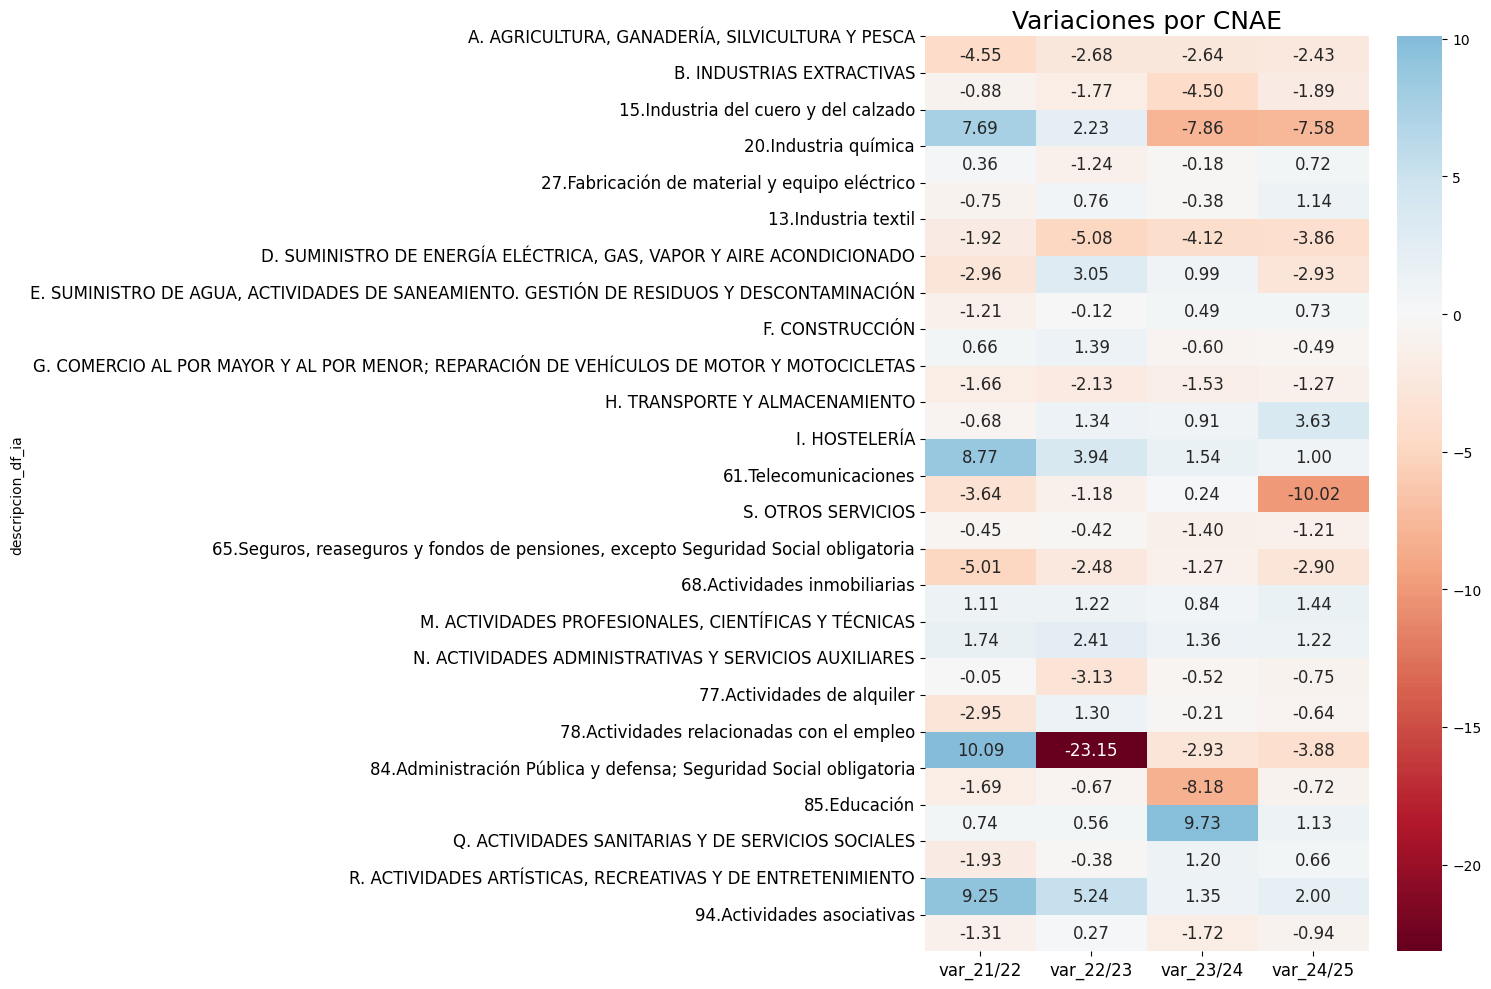

In [40]:
cols = ['var_21/22', 'var_22/23', 'var_23/24', 'var_24/25']

df_subset2 = df_seleccio[cols]

plt.figure(figsize=(15, 10))

sns.heatmap(
    df_subset2,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0,
    annot_kws={"fontsize": 12} 
)

plt.yticks(
    ticks=range(len(df_seleccio)),
    labels=df_seleccio.index,
    fontsize=12
)

plt.xticks(fontsize=12)

plt.title("Variaciones por CNAE", fontsize=18)

plt.tight_layout()
plt.show()